In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import  seaborn as sns
import sklearn
%matplotlib inline

1. Load Data and Initial Rewiev

In [128]:
data=pd.read_csv("Advertising.csv")#Loading the dataset

In [129]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [130]:
data.head()#Cheking first 5 elements of data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [131]:
data.info()#Infos about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


The dataset does not contain null values and the data types are correctly `float64`, so there is no need to manipulate the data.

In [132]:
data.isnull().sum()#Chacking for null values of dataset

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

As you can see, there are no null values.

In [133]:
data.describe()#Describe the basic statistic of dataset features

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


2. Train-Test Split and Preprocessing

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [135]:
x=data[['TV','radio','newspaper']]#Features
y=data['sales']#Target

In [136]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#Split data set for test and train (%80 train) (%20 test)

In [137]:
#Scaling
scaler=StandardScaler()

Dataset should be scaled because many regression algorithms working in same scaled features.

Using StandardScaler for scale the features

In [138]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)#Because of data leakage in test only transform() used

In [139]:
X_train

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

All independent variables are contiguous and numeric so satisfied the basic requirement of regressions and scaled.

4. Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
regression=LinearRegression()#Linear Regression

In [142]:
linear_regression=regression.fit(X_train,y_train)#Traning the model

In [143]:
y_pred_linear=regression.predict(X_test)#Predict of test

In [144]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Evaluting model performance with rmse mae and r2score

In [145]:
rmse_linear=np.sqrt(mean_squared_error(y_test,y_pred_linear))#Test of rmse score
mae_linear=mean_absolute_error(y_test,y_pred_linear)#Test of mae score
r2_linear=r2_score(y_test,y_pred_linear)#Test of r2 score
print("Test RMSE:",rmse_linear)
print("Test MAE:",mae_linear)
print("Test R2:",r2_linear)

Test RMSE: 1.781599661533451
Test MAE: 1.4607567168117601
Test R2: 0.8994380241009119


Interpret About Results

1. RMSE Interpretation: The standard deviation of the prediction errors is about 1.78. This metric penalize larger errors.
2. MAE Interpretation: On average, the model's predictions are off by approximately 1,460 units of sales.
3. R2 Interpretation: Approximately 89.9% of the variance in sales can be explained by the advertising budgets (TV, Radio, Newspaper). This indicates a strong fit.

Cross Validation

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
cv_r2 = cross_val_score(regression, x, y, cv=5, scoring='r2').mean()#5 cross validation and average of them

In [148]:
print("CV Average R2:",cv_r2)

CV Average R2: 0.8871063495438436


Interpret About Result

The cross-validation scores are very close to the test set scores(RMSE,MAE,R2), confirming that the model generalizes well and is not overfitting.

5. Ridge Regression

In [149]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [150]:
ridge_grid={'alpha':[0.01, 0.1, 1, 10, 100]}#Choosing the best alphe from these values [0.01, 0.1, 1, 10, 100]
ridge=GridSearchCV(Ridge(), ridge_grid, cv=5, scoring='r2')#Choosing the best regression
Ridge=ridge.fit(X_train,y_train)#ridge training

Best Alpha by R2 Ridge

In [151]:
print(f"Best Ridge Alpha: {ridge.best_params_['alpha']}")#Best Alpha by r2 scoring

Best Ridge Alpha: 1


Risge Scoores (RMSE,MAE,R2)

In [152]:
y_pred_ridge=ridge.predict(X_test)
rmse_ridge=np.sqrt(mean_squared_error(y_test,y_pred_ridge))#Test of rmse score
mae_ridge=mean_absolute_error(y_test,y_pred_ridge)#Test of mae score
r2_ridge=r2_score(y_test,y_pred_ridge)#Test of r2 score
print("Test RMSE:",rmse_ridge)
print("Test MAE:",mae_ridge)
print("Test R2:",r2_ridge)

Test RMSE: 1.7872201577332216
Test MAE: 1.464301291647511
Test R2: 0.8988025280800618


Ridge VS Linear Regression (RMSE,MAE,R2)

In [153]:
rmse_difference=rmse_linear-rmse_ridge
mae_difference=mae_linear-mae_ridge
r2_difference=r2_linear-r2_ridge
print("Difference of RMSE:",rmse_difference)
print("Difference MAE:",mae_difference)
print("Difference R2:",r2_difference)

Difference of RMSE: -0.005620496199770564
Difference MAE: -0.003544574835750991
Difference R2: 0.0006354960208501126


Interpretation: The difference between linear regression scores and ridge scores are very small. This shows us they are giving us the same results and there is no overfitting and linear regression is good model for this dataset.

6. Lasso Regression

In [154]:
from sklearn.linear_model import Lasso

In [155]:
lasso_grid={'alpha':[0.01, 0.1, 1, 10, 100]}#Choosing the best alpha from these values [0.01, 0.1, 1, 10, 100]
lasso=GridSearchCV(Lasso(), lasso_grid, cv=5, scoring='r2')#Choosing the best regression
Lasso =lasso.fit(X_train,y_train)#lasso training

Best Alpha by r2 Lasso

In [156]:
print(f"Best Lasso Alpha: {lasso.best_params_['alpha']}")#Best Alpha by r2 scoring

Best Lasso Alpha: 0.1


Lasso Scores (RMSE,MAE,R2)

In [157]:
y_pred_lasso=lasso.predict(X_test)
rmse_lasso=np.sqrt(mean_squared_error(y_test,y_pred_lasso))#Test of rmse score
mae_lasso=mean_absolute_error(y_test,y_pred_lasso)#Test of mae score
r2_lasso=r2_score(y_test,y_pred_lasso)#Test of r2 score
print("Test RMSE:",rmse_lasso)
print("Test MAE:",mae_lasso)
print("Test R2:",r2_lasso)

Test RMSE: 1.7913338117315942
Test MAE: 1.4612734376961356
Test R2: 0.8983361384489735


In [158]:
print("Lasso Coefficients:", dict(zip(x.columns, lasso.best_estimator_.coef_)))

Lasso Coefficients: {'TV': np.float64(3.6692057414410684), 'radio': np.float64(2.719146674603441), 'newspaper': np.float64(0.0)}


This shows us lasso choose newspaper coefficient zero and TV,radio coefficients are non-zero

Interpretation: Lasso identified TV and Radio as the most important predictors for sales. It completely removed Newspaper from the model (coefficient = 0), implying that Newspaper advertising spend does not contribute useful information for predicting sales when TV and Radio are already in the model.

7. Model Performance Comparison (Graph)

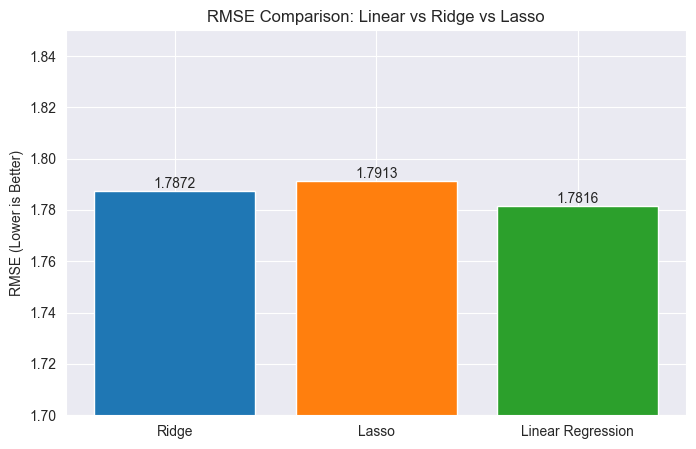

In [159]:
plt.figure(figsize=(8, 5))#figure size
bars = plt.bar(["Ridge","Lasso","Linear Regression"], [rmse_ridge,rmse_lasso,rmse_linear], color=['#1f77b4', '#ff7f0e', '#2ca02c'])#bar names, values and colors
plt.ylabel('RMSE (Lower is Better)')#y label
plt.title('RMSE Comparison: Linear vs Ridge vs Lasso')#Title
plt.ylim(1.7, 1.85) # Zoom to show differences
for bar in bars:#To show easily values of RMSE
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

Interpretation:The bars are nearly identical in height. This visually confirms our earlier finding that Linear Regression and Ridge Regression have almost indistinguishable performance on this dataset. Lasso Regression has a marginally higher RMSE (1.7913) compared to the other two. This is because Lasso forced the newspaper coefficient to zero.

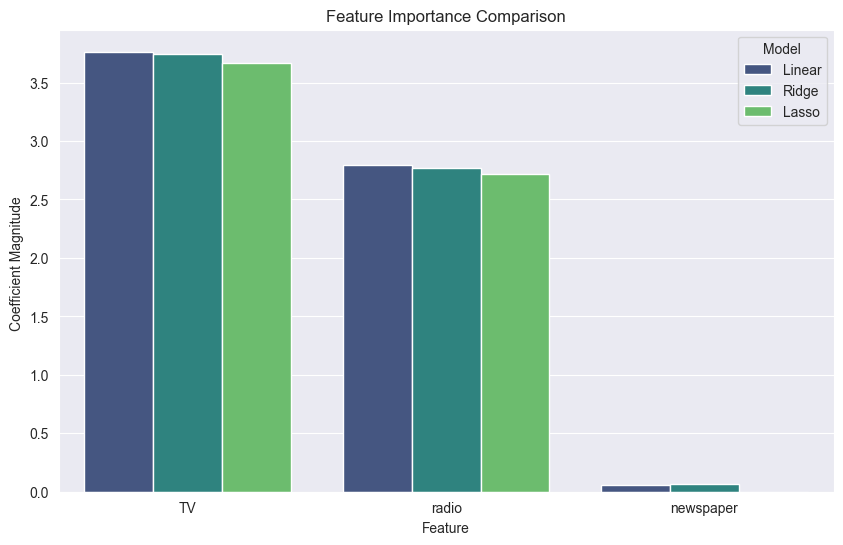

In [160]:
models={'Linear':linear_regression,'Ridge':Ridge.best_estimator_,'Lasso':Lasso.best_estimator_}#Array for models
data = []
for name, model in models.items():
    coefs = model.coef_#save for model coefficients
    for i, col in enumerate(x.columns):
        data.append({'Feature': col, 'Model': name, 'Coefficient': coefs[i]})#data frame construction
df_coef = pd.DataFrame(data)#saving coefficients to dataframe

plt.figure(figsize=(10, 6))
sns.barplot(data=df_coef, x='Feature', y='Coefficient', hue='Model', palette='viridis')
plt.title('Feature Importance Comparison')
plt.ylabel('Coefficient Magnitude ')
plt.show()

Interpretation: As we observed in the performance metrics, the coefficients for Linear Regression and Ridge Regression are nearly identical. Ridge did not significantly shrink the coefficients because the model wasn't overfitting.Lasso assigned coefficient of newspaper to 0 so it differe from other models. That plot show us the importance of features for prediction. TV is most important than Radio and newspaper is least important.